## Agenda

- Naive Model
- Simple Average
- Moving Average
- Weighted Moving Average
- Exponential Smoothing
- Double Exponential Smoothing
- Holt's Winters
- Autoregressive Linear Model (AR)
- ARIMA
- SARIMA
- Prophet

### Problem Statement:

energy consumption

In [1]:
#importing required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading the data
data = pd.read_csv("data/energy consumption.csv")

In [4]:
data.shape

(969, 2)

In [5]:
data.head()

,DATE,ENERGY_INDEX
0,01/1939,3.3842
1,02/1939,3.4100
2,03/1939,3.4875
3,04/1939,3.5133
4,05/1939,3.5133


In [6]:
data.tail()

,DATE,ENERGY_INDEX
964,05/2019,91.9046
965,06/2019,98.4397
966,07/2019,112.9469
967,08/2019,111.6645
968,09/2019,102.2911


# Hold Out Validation

In [10]:
data.shape

(969, 2)

In [14]:
# dividing into train and validation sets

train_data = data[:924]
valid_data = data[924:]

In [17]:
print(train_data.shape)
train_data.tail()

(924, 2)


,DATE,ENERGY_INDEX
919,08/2015,110.7643
920,09/2015,101.7996
921,10/2015,90.9888
922,11/2015,92.2113
923,12/2015,102.3222


In [16]:
print(valid_data.shape)
valid_data.head()

(45, 2)


,DATE,ENERGY_INDEX
924,01/2016,116.8926
925,02/2016,105.9614
926,03/2016,94.2339
927,04/2016,88.1615
928,05/2016,89.4711


In [18]:
train_data.dtypes

DATE             object
ENERGY_INDEX    float64
dtype: object

#### Task 1

- Change the datatype of the Datetime variable (for both train and val) to the required format 
- Also set the index of the datasets to datetime

In [20]:
## changing datatype of train
train_data['DATE'] = pd.to_datetime(train_data['DATE'],format=?????)

#and adding index
train_data.index = train_data['DATE']

In [ ]:
## changing datatype of validation
valid_data['DATE'] =  ?????

#and adding index
valid_data.index = ?????

#### Task 1 - solution

In [102]:
## changing datatype of train
train_data['DATE'] = pd.to_datetime(train_data['DATE'],format='%m/%Y')

#and adding index
train_data.index = train_data['DATE']



## changing datatype of validation
valid_data['DATE'] = pd.to_datetime(valid_data['DATE'],format='%m/%Y')

#and adding index
valid_data.index = valid_data['DATE']

# Plotting the data

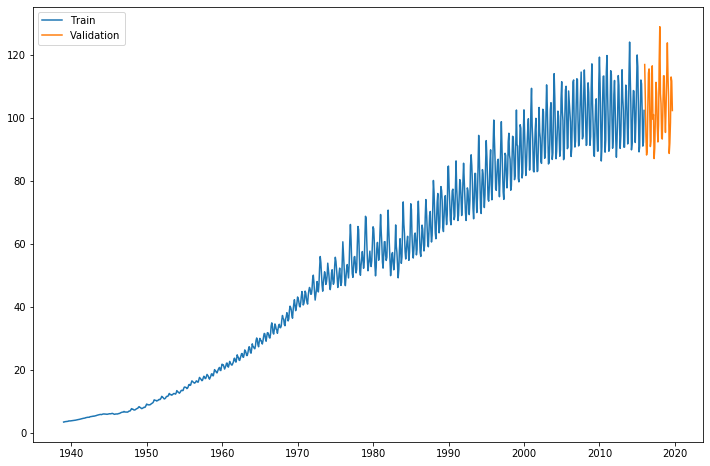

In [22]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='Train')
plt.plot(valid_data.index, valid_data['ENERGY_INDEX'], label='Validation')
plt.legend(loc='best')
plt.show()

# Naive Model
Use the last (most recent) value of train as the predictions


<img src="naive formula.png" width=160 height=100 />

#### Task 2 -
- Find the last value of train data
- Make the predictions as this value

In [ ]:
# find the last value of the train data
# Hint: indexing starts from 0

train_data['Sessions'][?????]

In [ ]:
# Defining predictions for validation
valid_data['naive'] = ??????

#### Task 2- Solution

In [23]:
print(train_data.shape)
train_data.tail()

(924, 2)


,DATE,ENERGY_INDEX
DATE,,
2015-08-01,2015-08-01,110.7643
2015-09-01,2015-09-01,101.7996
2015-10-01,2015-10-01,90.9888
2015-11-01,2015-11-01,92.2113
2015-12-01,2015-12-01,102.3222


In [25]:
train_data['ENERGY_INDEX'][923]

102.3222

In [26]:
# Defining predictions for validation
valid_data['naive'] = train_data['ENERGY_INDEX'][923]

# Visualizing Naive Approach Results

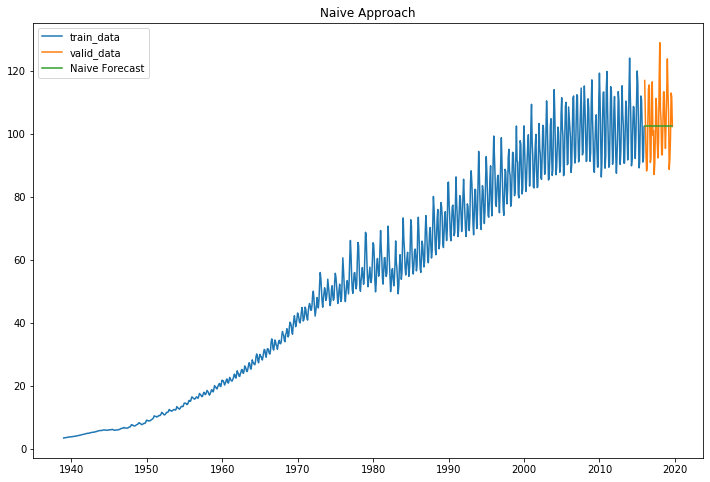

In [27]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid_data')
plt.plot(valid_data.index,valid_data['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Approach")
plt.show()

In [28]:
# calculating rmsle 
rmsle = sqrt(mean_squared_log_error(valid_data['ENERGY_INDEX'], valid_data['naive']))
print('The rmsle value for Naive Approach is', rmsle*100)

The rmsle value for Naive Approach is 9.791544303246656


- Can be considered as a benchmark model
- Predicts same value for all future data 

# Simple Average

Taking average of the complete data

#### Task 3 - 
- Find average of the complete data
- Use this average as predictions

In [ ]:
# find average of complete data

In [ ]:
# Define predictions for validation
valid_data['simple_average'] = ?????

#### Task 3- Solution

In [29]:
# average 
train_data['ENERGY_INDEX'].mean()

52.2694755411256

In [30]:
# Defining predictions for validation
valid_data['simple_average'] = train_data['ENERGY_INDEX'].mean()

## Visualizing SImple Average Results 

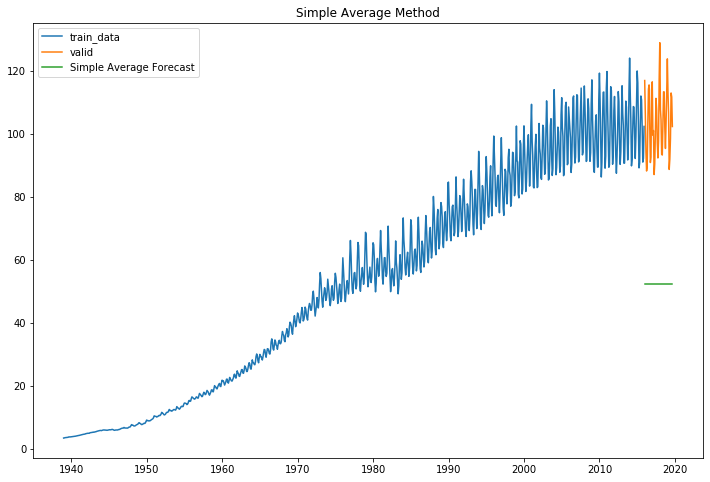

In [31]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index, valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index, valid_data['simple_average'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [32]:
# calculating RMSLE 
rmsle = sqrt(mean_squared_log_error(valid_data['ENERGY_INDEX'], valid_data['simple_average']))
print('The RMSLE value for Simple Approach is', rmsle*100)

The RMSLE value for Simple Approach is 67.79648116977285


# We can remove the above... not necessary

#### Task 4-

- Determine Average of year (12 months)
- Make predictions using this average

In [ ]:
# Print values of last month from train
# Hint - train shape is (924,4)

train_data[???:???]

In [ ]:
# store values of last month in a list

temp = 


In [ ]:
# print the list and average values
print('Lask month values are:', temp)
print('Average for last month is', temp.mean())

In [ ]:
# Defining predictions for validation
valid_data['average_lastmonth'] = ????

#### Task 4 - solution

In [34]:
# values of last month
print(train_data.shape)
(train_data[912:]).shape

(924, 2)


(12, 2)

In [35]:
# store values of last month separately

temp = (train_data['ENERGY_INDEX'][912:]).values
print('Lask month values are:', temp)
print('Average for last month is', temp.mean())

Lask month values are: [119.9317 116.1393 104.0218  89.1544  90.695  102.8863 111.9826 110.7643
 101.7996  90.9888  92.2113 102.3222]
Average for last month is 102.74144166666667


In [36]:
# Defining predictions for validation
valid_data['average_lastmonth'] = temp.mean()

## Visualizing Results

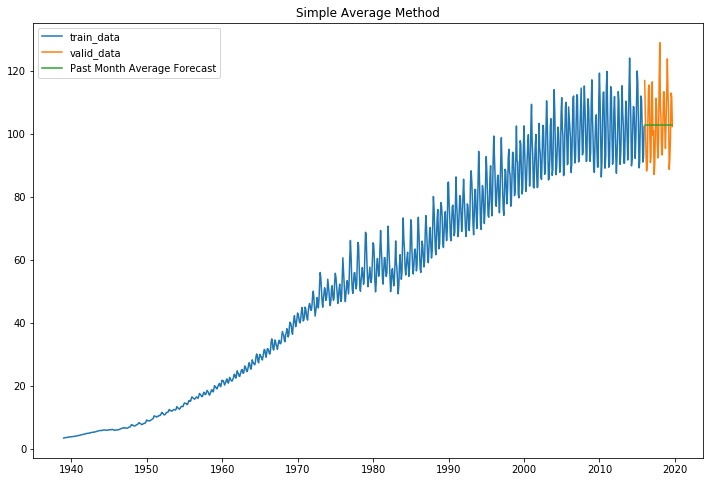

In [37]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid_data')
plt.plot(valid_data.index,valid_data['average_lastmonth'], label='Past Month Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [38]:
# calculating RMSLE 
RMSLE = sqrt(mean_squared_log_error(valid_data['ENERGY_INDEX'], valid_data['average_lastmonth']))
print('The RMSLE value for Simple Approach is', RMSLE*100)

The RMSLE value for Simple Approach is 9.765056404963946


# Moving Average

We have a straight line here because same average value is predicted for all future points. We can change the 'last 12 months' value for each data point.

#### task 5
- Store last year's values in a list
- slide window for 12 months

hint- keep adding predictions to the list

In [ ]:
# list holding last week values

valid_data['moving_average'] = 0
week_values = [???????]

In [ ]:
# loop to take average of last 7 values
for i in range(0,len(valid_data)):
    
    end = ???
    start = ???
    pred = mean(week_values[start:end])
    
    valid_data['moving_average'][i] = pred
    week_values.append(pred)

#### Task 5 - Solution

In [41]:
# list holding last week values

valid_data['moving_average'] = 0
week_values = train_data['ENERGY_INDEX'][912:].values
week_values = week_values.tolist()

In [42]:
# loop to take average of last 7 values
for i in range(0,len(valid_data)):
    end = len(week_values)
    start = len(week_values)-12
    pred = mean(week_values[start:end])
    
    valid_data['moving_average'][i] = pred
    week_values.append(pred)

# Visualize results

In [43]:
valid_data['moving_average'].shape

(45,)

In [45]:
len(valid_data)

45

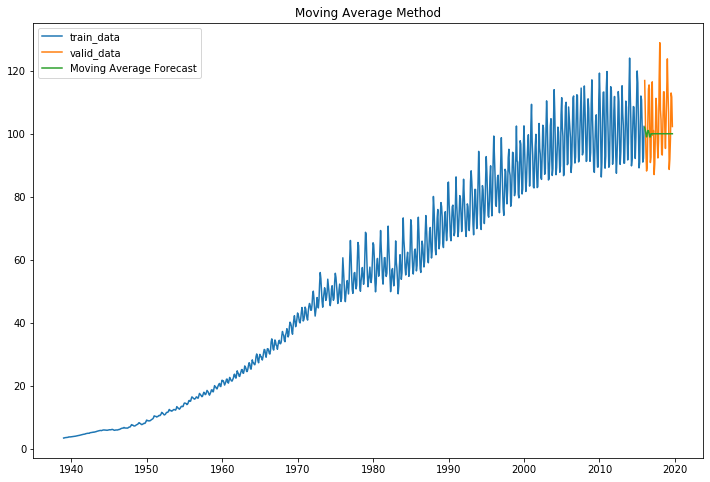

In [46]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid_data')
plt.plot(valid_data.index,valid_data['moving_average'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title("Moving Average Method")
plt.show()

In [48]:
# calculating RMSLE 
RMSLE = sqrt(mean_squared_log_error(valid_data['ENERGY_INDEX'], valid_data['moving_average']))
print('The RMSLE value for Moving Approach is', RMSLE*100)

The RMSLE value for Moving Approach is 10.094114575782633


- All values become same after a point.
- Hence the average becomes constant

# Weighted Moving Average
move a window and assign weights to the values in this window. I am taking higher weights to recent observations.

#### Task 6-

- Store last 12 values in a list
- Define a loop to implement weighted moving average

In [ ]:
# list holding last seven values
valid_data['weighted_moving_average'] = 0

week_values = [????]

In [51]:
# defining weights
weights = []
for i in range(1,13):
    W = i/14
    weights.append(W)

In [53]:
# check, the length should match
len(week_values), len(weights)

(57, 12)

In [ ]:
# Loop for weighted moving average

for i in range(0,len(valid_data)):
    
    end = ???
    start = ???
    
    final_values = week_values[start:end]
    
    weighted_mean = 0
    for j, k in zip(weights,final_values):
        weighted_mean += j*k
        
    weighted_mean = weighted_mean/sum(weights)
        
    valid_data['weighted_moving_average'][i] = weighted_mean
    week_values.append(weighted_mean)

#### Task 6- Solution

In [54]:
# list holding last seven values
valid_data['weighted_moving_average'] = 0

week_values = train_data['ENERGY_INDEX'][912:].values
week_values = week_values.tolist()

In [55]:
# defining weights
weights = []
for i in range(1,13):
    W = i/14
    weights.append(W)

In [56]:
len(week_values), len(weights)

(12, 12)

In [57]:
for i in range(0,len(valid_data)):
    
    end = len(week_values)
    start = len(week_values)-12
    
    final_values = week_values[start:end]
    
    weighted_mean = 0
    for j, k in zip(weights,final_values):
        weighted_mean += j*k
        
    weighted_mean = weighted_mean/sum(weights)
        
    valid_data['weighted_moving_average'][i] = weighted_mean
    week_values.append(weighted_mean)

## Visualizing results

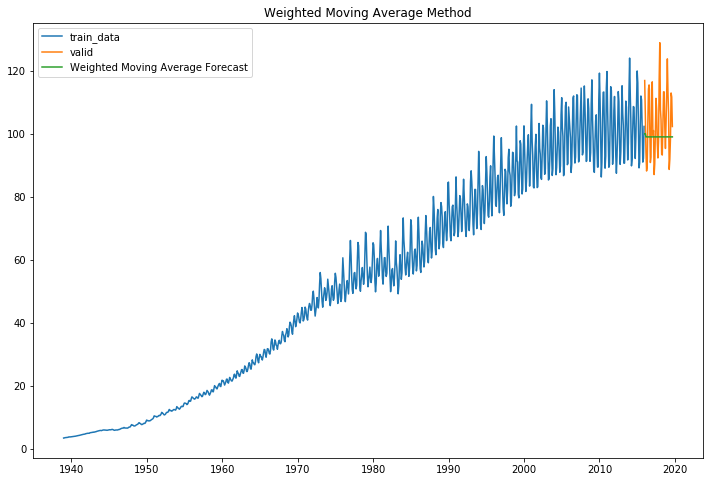

In [58]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['weighted_moving_average'], label='Weighted Moving Average Forecast')
plt.legend(loc='best')
plt.title("Weighted Moving Average Method")
plt.show()

In [60]:
# calculating RMSLE 
RMSLE = sqrt(mean_squared_log_error(valid_data['ENERGY_INDEX'], valid_data['weighted_moving_average']))
print('The RMSLE value for Weighted Moving Approach is', RMSLE*100)

The RMSLE value for Weighted Moving Approach is 10.539364211935808


# Exponential Smoothing

similar to weighted averaging, but weights are assigned in exponentially increasing manner (Selected by the model)

In [61]:
# importing simple exponential smoothing
from statsmodels.tsa.api import SimpleExpSmoothing

#### Task 7-

- Use Simple Exponential Smoothing to make predictions

In [ ]:
# Define the model
# hint- replace ???? with the column 

model = SimpleExpSmoothing(np.asarray(??????)) 

In [ ]:
# train the model
fit2 = ?????


In [ ]:
# make predictions
valid_data['SES'] = ?????

#### Task 7- Solution

In [62]:
# model training on the train data 
model = SimpleExpSmoothing(np.asarray(train_data['ENERGY_INDEX']))
fit2 = model.fit(smoothing_level=0.4, optimized=False) 

#model predictions
valid_data['SES'] = fit2.forecast(len(valid_data)) 

## Visualize results

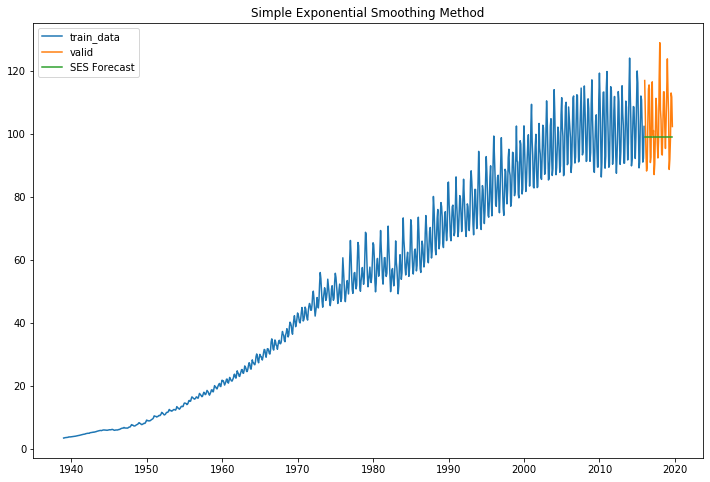

In [63]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['SES'], label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [64]:
# calculating RMSLE 
RMSLE = sqrt(mean_squared_log_error(valid_data['ENERGY_INDEX'], valid_data['SES']))
print('The RMSLE value for Simple Exponential Smoothing Method is', RMSLE*100)

The RMSLE value for Simple Exponential Smoothing Method is 10.658853947563808


# Double Exponential Smoothing

In [65]:
# importing module
from statsmodels.tsa.api import ExponentialSmoothing

#### Task 8-
- Use Double Exponential Smoothing to make predictions 

In [ ]:
# Define the model
#hint- replace ???? with the column 

model = ExponentialSmoothing(np.asarray(??????) ,trend='add') 

In [ ]:
# train the model
fit2 = ?????


In [ ]:
# make predictions
valid_data['DES'] = ?????

#### Task 8- Solution

In [70]:
#training
model = ExponentialSmoothing(np.asarray(train_data['ENERGY_INDEX']) ,trend='add')
fit1 = model.fit() 

# predictions
valid_data['DES'] = fit1.forecast(len(valid_data)) 

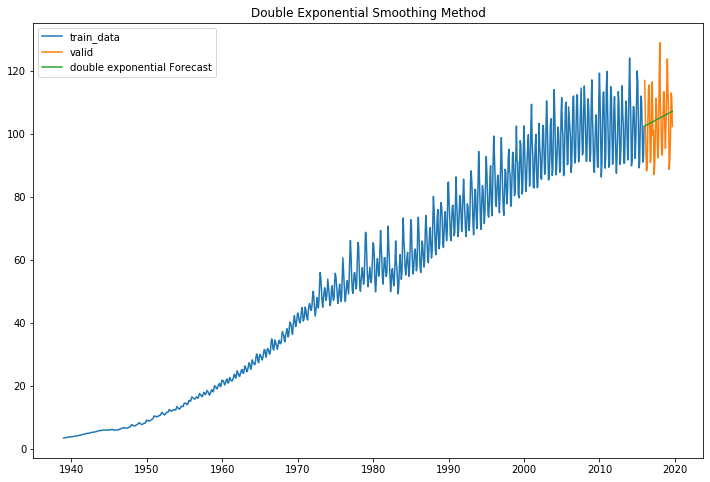

In [71]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['DES'], label='double exponential Forecast')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing Method")
plt.show()

In [72]:
# calculating RMSLE 
RMSLE = sqrt(mean_squared_log_error(valid_data['ENERGY_INDEX'], valid_data['DES']))
print('The RMSLE value for Double exponential smoothing Method is', RMSLE*100)

The RMSLE value for Double exponential smoothing Method is 9.788604252375373


# Holt's Winters (aka triple enponential smoothing)

In [73]:
#importing module
from statsmodels.tsa.api import ExponentialSmoothing

#### Task 9-
- Use Hold winters (Exp smoothing with trend and seasonality) for making predictions

In [ ]:
# Define the model
#hint- replace ???? with the column 

model = ExponentialSmoothing(np.asarray(??????), seasonal_periods=7 ,trend='add', seasonal='add') 

In [ ]:
# train the model
fit2 = ?????


In [ ]:
# make predictions
valid_data['Holt_Winter'] = ?????

#### Task 9- Solution

In [76]:
#training model
model = ExponentialSmoothing(np.asarray(train_data['ENERGY_INDEX']), seasonal_periods=7 ,trend='add', seasonal='mul')
fit1 = model.fit() 

#making predictions
valid_data['Holt_Winter'] = fit1.forecast(len(valid_data)) 

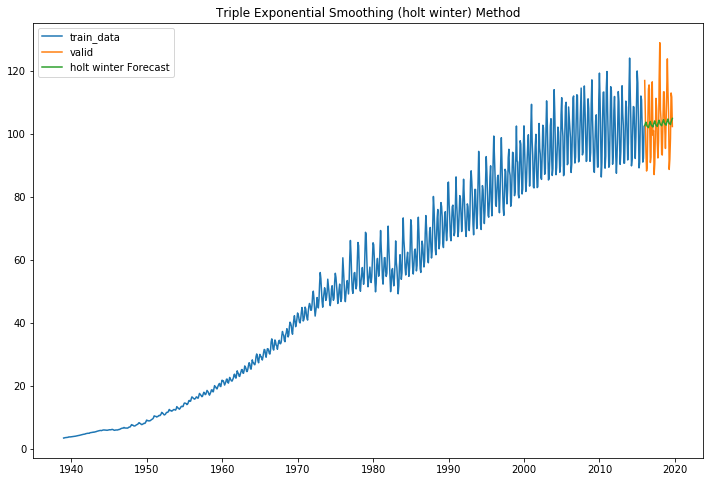

In [77]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [78]:
# calculating RMSLE 
RMSLE = sqrt(mean_squared_log_error(valid_data['ENERGY_INDEX'], valid_data['Holt_Winter']))
print('The RMSLE value for Holt Winter Method is', RMSLE*100)

The RMSLE value for Holt Winter Method is 9.70162538515474
